<a href="https://colab.research.google.com/github/Thib433/MPA-MLF-Thibaud-Doireau-2025/blob/main/MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [14]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
#print(iris.data[0:5,:])
#print(iris.target[0:5])
print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

Split data into training and testing parts:

In [15]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
print(y.shape)

(120, 4)
(30, 4)
(120,)
(30,)
(150, 4)
(150,)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
# 2 first column
X = iris.data[:, :2]
y = iris.target

# keep only classes 0 et 1
mask = y < 2
X = X[mask]
y = y[mask]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

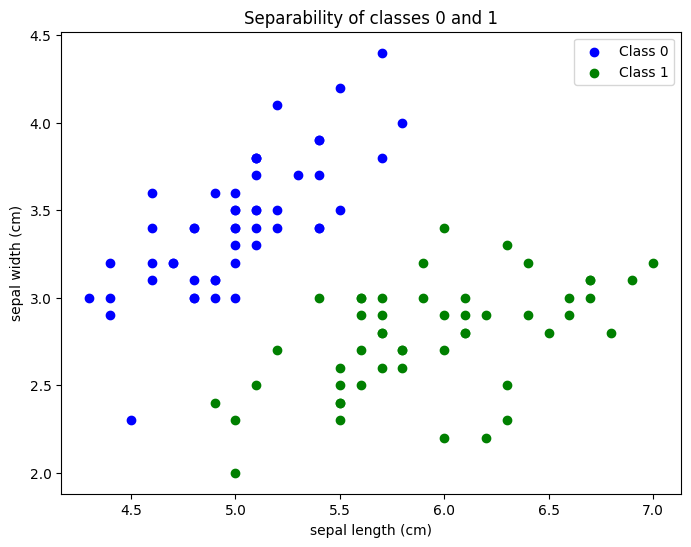

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# plot for separability verification
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Separability of classes 0 and 1")
plt.legend()
plt.show()




Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

(100, 2)
(100,)


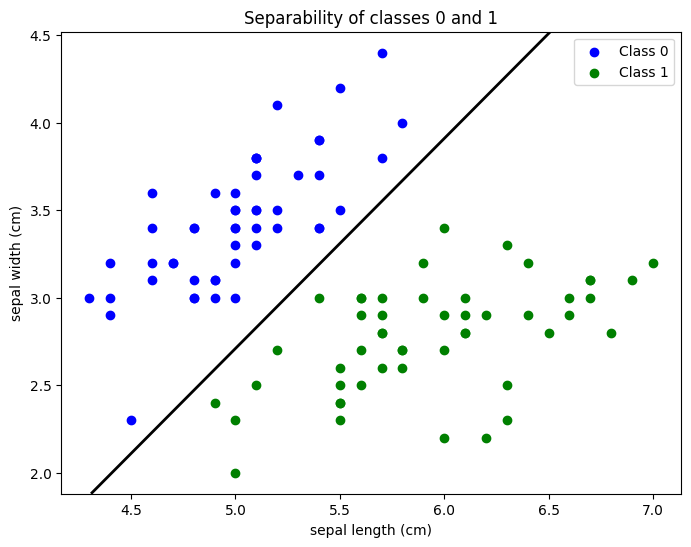

In [18]:
X=iris.data[iris.target!=2,0:2]
print(X.shape)
y=iris.target[iris.target!=2]
print(y.shape)
SVMmodel_1=SVC(kernel='linear', C=200)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2)
SVMmodel_1.fit(X_train_1,y_train_1)
SVMmodel_1.score(X_test_1,y_test_1)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Separability of classes 0 and 1")
plt.legend()

# Plot the decision frontier of the SVM model
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points to predict classes
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = SVMmodel_1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.show()







Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

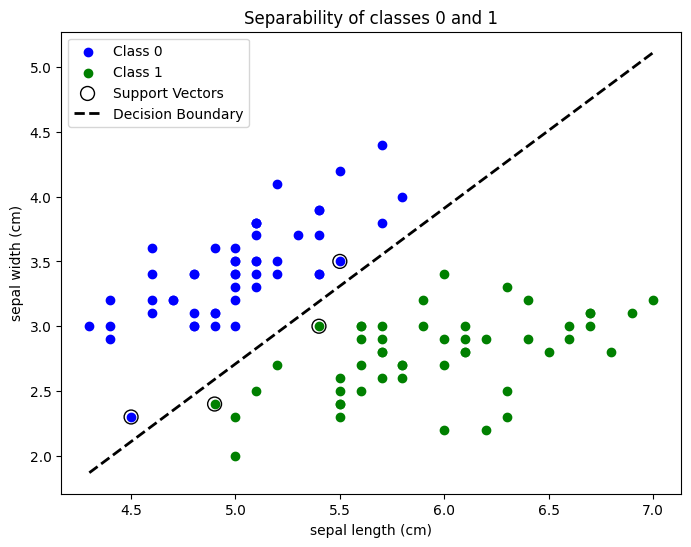

In [19]:
# plot for separability verification
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Class 1')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Separability of classes 0 and 1")
plt.legend()


# Display support vectors
supvectors = SVMmodel_1.support_vectors_
plt.scatter(supvectors[:, 0], supvectors[:, 1],
            s=100, facecolors='none', edgecolors='black', label='Support Vectors')

# Draw the dividing line based on the model equation
W = SVMmodel_1.coef_
b = SVMmodel_1.intercept_
x1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2 = -b/W[0, 1] - W[0, 0]/W[0, 1] * x1
plt.plot(x1, x2, color='black', linestyle='dashed', linewidth=2, label='Decision Boundary')

plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

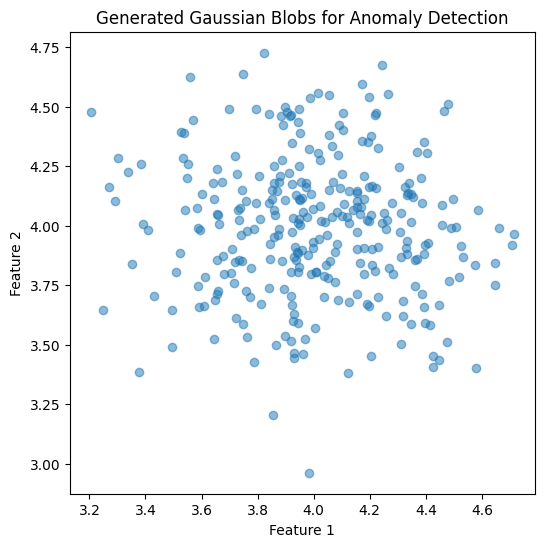

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import random

# Generate data (Gaussian blobs in 2D)
random.seed(11)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.3, center_box=(4, 4))

# Visualize the generated data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], alpha =0.5)
plt.title("Generated Gaussian Blobs for Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

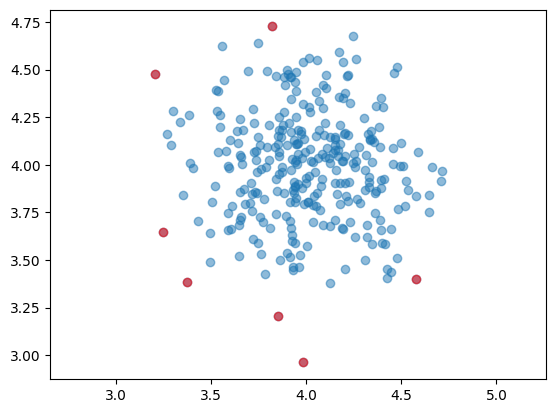

In [9]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(X)
pred = SVMmodelOne.predict(X)
anom_index = np.where(pred==-1)
values = X[anom_index]

plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.scatter(values[:,0], values[:,1], color='red', alpha=0.5)
plt.axis('equal')
plt.show()



Plot the support vectors:

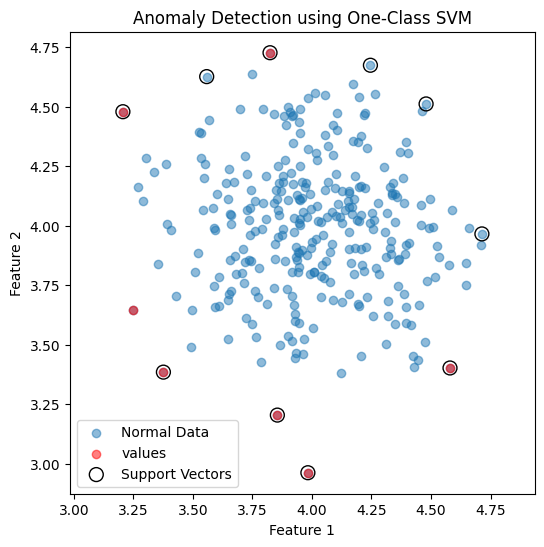

In [10]:
#Get support vectors
support_vectors = SVMmodelOne.support_vectors_

#Visualize data, anomalies, and the support vectors
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1],alpha=0.5, label='Normal Data')
plt.scatter(values[:, 0], values[:, 1],alpha=0.5 ,color='red', label='values')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], edgecolors='black', facecolors='none', s=100, label='Support Vectors')
plt.title("Anomaly Detection using One-Class SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.axis('equal')
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


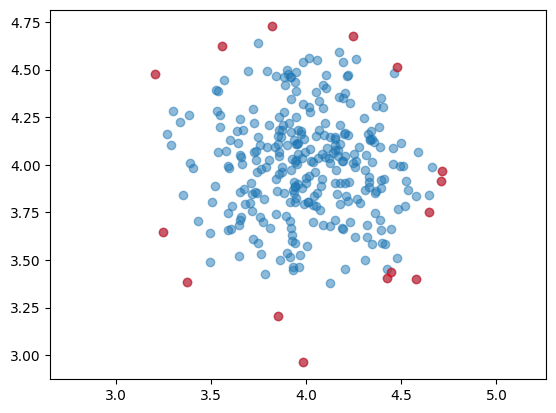

In [11]:
scores = SVMmodelOne.score_samples(X)

thresh = np.quantile(scores, 0.05)
print(thresh)
index = np.where(scores<=thresh)
values = X[index]

plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.scatter(values[:,0], values[:,1], alpha=0.5,color='red')
plt.axis('equal')
plt.show()